#### 이번 시간의 크기 조절, 규제, 드롭아웃 모두 모델의 과소적합, 과대적합을 방지하는 방법이다.

# 1. 데이터 로드, 전처리

In [1]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


# 2. 모델 구성, 컴파일

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


# 3. 모델 학습

In [3]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 74ms/step - loss: 0.4268 - accuracy: 0.8026 - val_loss: 0.2874 - val_accuracy: 0.8898
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2366 - accuracy: 0.9089 - val_loss: 0.3383 - val_accuracy: 0.8580
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1708 - accuracy: 0.9343 - val_loss: 0.3121 - val_accuracy: 0.8747
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1146 - accuracy: 0.9576 - val_loss: 0.3999 - val_accuracy: 0.8580
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 0.0702 - accuracy: 0.9750 - val_loss: 0.4539 - val_accuracy: 0.8625
Epoch 6/30
49/49 [==============================] - 1s 23ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.4812 - val_accuracy: 0.8747
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.5619 - val_accuracy: 0.8724
Epoch 8/30
49

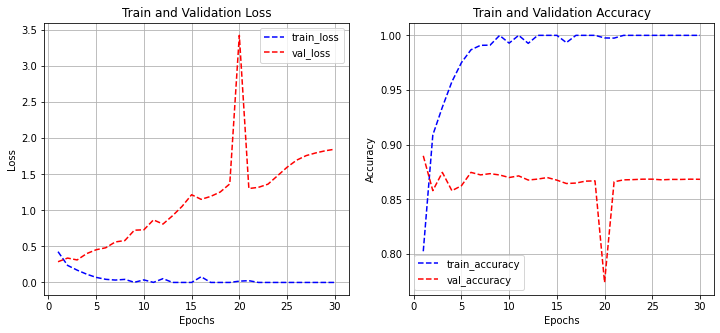

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 4. 모델 크기 바꾸기

## 1) 크기 증가

In [5]:
#Dense 레이어의 유닛수를 128 -> 2048 로 크게 증가시켰더니, 모델의 파라미터 수가 엄청 늘었다

b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 2048)              20482048  
_________________________________________________________________
hidden3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
output3 (Dense)              (None, 1)                 2049      
Total params: 24,680,449
Trainable params: 24,680,449
Non-trainable params: 0
_________________________________________________________________


In [6]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 90ms/step - loss: 0.6912 - accuracy: 0.7818 - val_loss: 0.2793 - val_accuracy: 0.8854
Epoch 2/30
49/49 [==============================] - 2s 36ms/step - loss: 0.2283 - accuracy: 0.9101 - val_loss: 0.3006 - val_accuracy: 0.8817
Epoch 3/30
49/49 [==============================] - 2s 37ms/step - loss: 0.0955 - accuracy: 0.9655 - val_loss: 0.3547 - val_accuracy: 0.8829
Epoch 4/30
49/49 [==============================] - 2s 37ms/step - loss: 0.0569 - accuracy: 0.9845 - val_loss: 0.4879 - val_accuracy: 0.8782
Epoch 5/30
49/49 [==============================] - 2s 37ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 10.1068 - val_accuracy: 0.5304
Epoch 6/30
49/49 [==============================] - 2s 37ms/step - loss: 0.1734 - accuracy: 0.9866 - val_loss: 0.6281 - val_accuracy: 0.8820
Epoch 7/30
49/49 [==============================] - 2s 37ms/step - loss: 2.0762e-05 - accuracy: 1.0000 - val_loss: 0.7541 - val_accuracy: 0.8783
Epoch 8/

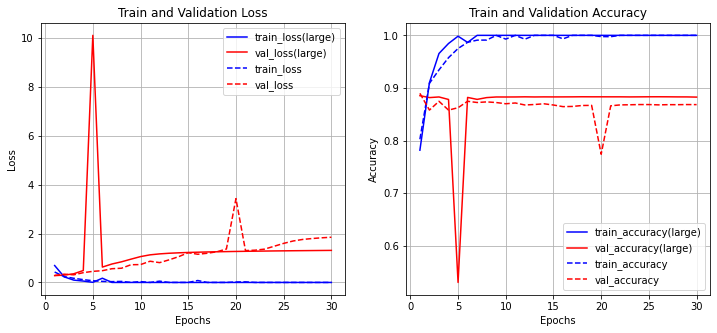

In [7]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 2) 크기 감소

In [9]:
#Dense 레이어의 유닛수를 128대신 16으로 줄여서 사용

s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 16)                160016    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 67ms/step - loss: 0.4518 - accuracy: 0.8180 - val_loss: 0.3305 - val_accuracy: 0.8822
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2550 - accuracy: 0.9108 - val_loss: 0.2857 - val_accuracy: 0.8884
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1976 - accuracy: 0.9276 - val_loss: 0.2868 - val_accuracy: 0.8868
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1629 - accuracy: 0.9418 - val_loss: 0.3040 - val_accuracy: 0.8814
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1435 - accuracy: 0.9483 - val_loss: 0.3165 - val_accuracy: 0.8795
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1235 - accuracy: 0.9566 - val_loss: 0.3427 - val_accuracy: 0.8759
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1105 - accuracy: 0.9608 - val_loss: 0.3644 - val_accuracy: 0.8727
Epoch 8/30
49

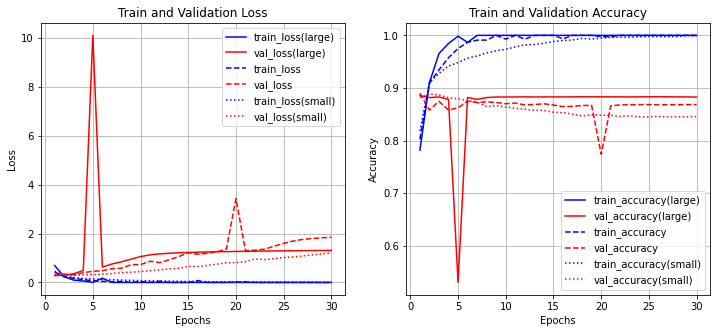

In [11]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 5. 규제 적용하기 (Regularization)
- 가중치의 분포를 균일하게 만들고, 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 갖도록 한다.
- kernel_regularizer='l2' 이런 식으로 레이어에 적용해준다.

## 1) L1 규제
- L1 규제는 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가 하는 방법이며, 가중치의 절대값은 L1 노름(norm) 이라고 합니다.

In [12]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 68ms/step - loss: 3.7239 - accuracy: 0.6044 - val_loss: 1.9154 - val_accuracy: 0.7513
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 1.8458 - accuracy: 0.7135 - val_loss: 1.7682 - val_accuracy: 0.7382
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 1.7198 - accuracy: 0.7489 - val_loss: 1.6746 - val_accuracy: 0.7732
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 1.6202 - accuracy: 0.7686 - val_loss: 1.5591 - val_accuracy: 0.7835
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5361 - accuracy: 0.7862 - val_loss: 1.5098 - val_accuracy: 0.7913
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 1.4732 - accuracy: 0.7945 - val_loss: 1.4359 - val_accuracy: 0.7984
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 1.4305 - accuracy: 0.8022 - val_loss: 1.4239 - val_accuracy: 0.8055
Epoch 8/30
49

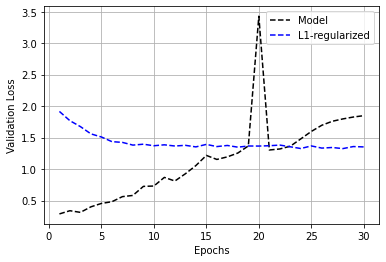

In [14]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## 2) L2 규제
- L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법 이며, 가중치의 제곱은 L2 노름(norm) 이라고 합니다.

In [15]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 68ms/step - loss: 0.7246 - accuracy: 0.8077 - val_loss: 0.5949 - val_accuracy: 0.8548
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.5419 - accuracy: 0.8760 - val_loss: 0.5291 - val_accuracy: 0.8749
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 0.4874 - accuracy: 0.8888 - val_loss: 0.5156 - val_accuracy: 0.8622
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4573 - accuracy: 0.8916 - val_loss: 0.4699 - val_accuracy: 0.8812
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 0.4398 - accuracy: 0.8951 - val_loss: 0.4655 - val_accuracy: 0.8744
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 0.4273 - accuracy: 0.8937 - val_loss: 0.4571 - val_accuracy: 0.8754
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.4159 - accuracy: 0.8968 - val_loss: 0.4440 - val_accuracy: 0.8787
Epoch 8/30
49

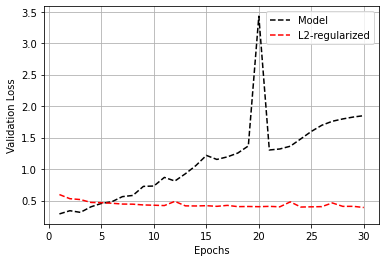

In [18]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## 3) L1 L2 규제
- L1과 L2 규제를 같이 적용하는 방법도 존재하는데, 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정해주면 됩니다.

In [19]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 68ms/step - loss: 3.9221 - accuracy: 0.6029 - val_loss: 2.0621 - val_accuracy: 0.6806
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 1.9750 - accuracy: 0.7107 - val_loss: 1.8933 - val_accuracy: 0.7299
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 1.8425 - accuracy: 0.7315 - val_loss: 1.7906 - val_accuracy: 0.7297
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 1.7324 - accuracy: 0.7488 - val_loss: 1.6759 - val_accuracy: 0.7634
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 1.6391 - accuracy: 0.7664 - val_loss: 1.6020 - val_accuracy: 0.7720
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5595 - accuracy: 0.7790 - val_loss: 1.5209 - val_accuracy: 0.7833
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 1.4945 - accuracy: 0.7933 - val_loss: 1.4719 - val_accuracy: 0.7941
Epoch 8/30
49

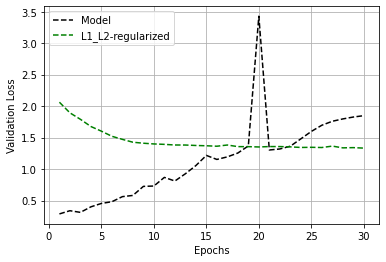

In [21]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

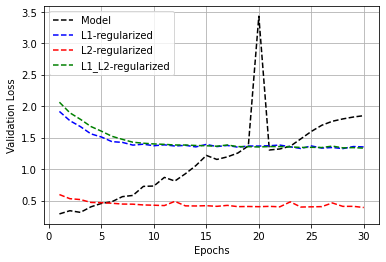

In [22]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 6. Dropout
- 드롭아웃은 모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용 하는 방법으로, 규제 기법 중 하나입니다.
- 그냥 진짜 레이어 사이에 Dropout 레이어만 추가해주면 됨. 사용이 간편함! 

In [23]:
#드롭아웃 비중 20%
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 68ms/step - loss: 0.5289 - accuracy: 0.7761 - val_loss: 0.3991 - val_accuracy: 0.8707
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3509 - accuracy: 0.8754 - val_loss: 0.3082 - val_accuracy: 0.8838
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2656 - accuracy: 0.9063 - val_loss: 0.2858 - val_accuracy: 0.8851
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2189 - accuracy: 0.9227 - val_loss: 0.2834 - val_accuracy: 0.8874
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1816 - accuracy: 0.9366 - val_loss: 0.2932 - val_accuracy: 0.8829
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1555 - accuracy: 0.9476 - val_loss: 0.3104 - val_accuracy: 0.8838
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1340 - accuracy: 0.9555 - val_loss: 0.3289 - val_accuracy: 0.8804
Epoch 8/30
49

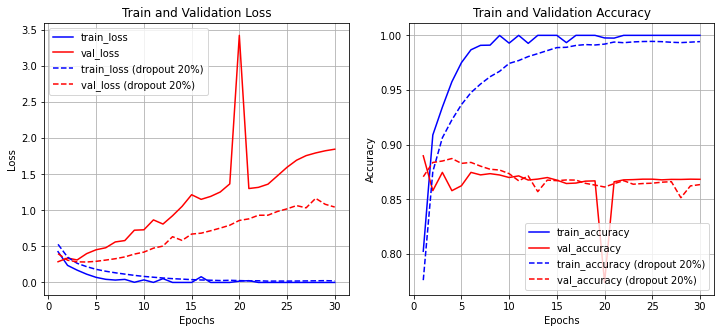

In [25]:
#시각화
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [26]:
#드롭아웃 비중 50%
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 66ms/step - loss: 0.5856 - accuracy: 0.6850 - val_loss: 0.4472 - val_accuracy: 0.8642
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4338 - accuracy: 0.8166 - val_loss: 0.3256 - val_accuracy: 0.8848
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3523 - accuracy: 0.8618 - val_loss: 0.2841 - val_accuracy: 0.8884
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2964 - accuracy: 0.8888 - val_loss: 0.2845 - val_accuracy: 0.8852
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2583 - accuracy: 0.9058 - val_loss: 0.2814 - val_accuracy: 0.8903
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2248 - accuracy: 0.9177 - val_loss: 0.2949 - val_accuracy: 0.8890
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2042 - accuracy: 0.9274 - val_loss: 0.3097 - val_accuracy: 0.8864
Epoch 8/30
49

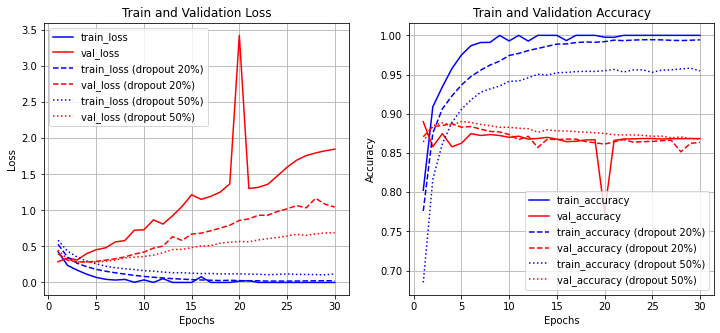

In [28]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

*  드롭아웃을 50% 적용한 모델이 과대적합 정도가 가장 많이 감소하였다